* decomposition of sulfuric acid: T >= 700C

H$_2$SO$_4$ $\rightarrow$ SO$_3$ + H$_2$O (T > 450C)

The sulfuric acid vapors are decomposed in two steps:

SO$_3$ $\rightarrow$ SO$_2$ + $\frac{1}{2}$O$_2$ (T > 800C)

The introduction says T>700, and now it says 800C...

At 1 bar, the production of sulfur dioxide decreases at T<800C. 50% at 700C, and no sulfur dioxide at 650C.

* Bunsen reaction: (exothermic reaction) T~120C

I$_2$ + SO$_2$ + 2H$_2$O $\rightarrow$ H$_2$SO$_4$ + 2HI

* decomposition of hydrogen iodide: T >= 300C

2HI $\rightarrow$ I$_2$ + H$_2$

Hydrogen is produced at P = 4MPa.

Production rate = 75 L/min.

Production rate for a 50MWth, 12000 kg/day.

https://art.inl.gov/NGNP/Subcontractors%20Documents/General%20Atomics/Sulfur%20Iodine%20Process%20Summary%20for%20the%20Hydrogen%20Technology%20Down-Selection.pdf

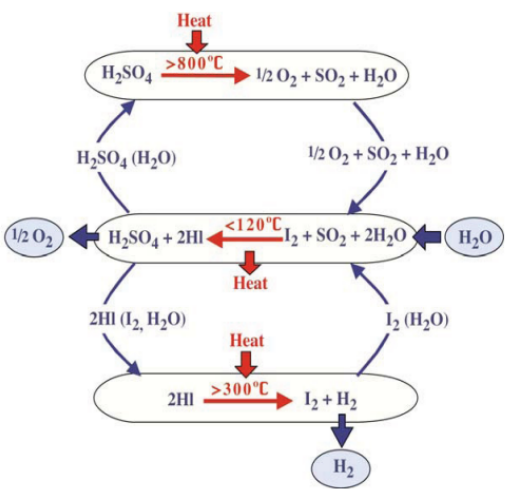

In [1]:
from IPython.display import Image
Image(filename='figures/sulfur1.png')

HYSYS simulator by Aspen Technologies. Most efficient temperature for sulfuric acid decomposition 650C, with a thermal efficiency of 75.11%. The simulation doesn't consider heat loss in the process. But the Bilgen's flowsheet gives a thermal efficiency of  77%.

Sulfuric acid decomposition:
2H$_2$SO$_4$ = 2H$_2$O + 2SO$_2$, $\Delta$H = 186 kJ/mol, T=600-900C

Hydriodic acid decomposition reaction:
2HI = H$_2$ + I$_2$, $\Delta$H = 12 kJ/mol

https://core.ac.uk/download/pdf/37987793.pdf 

https://www.hydrogen.energy.gov/pdfs/progress08/ii_h_1_pickard.pdf  

https://www.scirp.org/journal/paperinformation.aspx?paperid=90227

Sulfuric acid decomposition:
* Optimun temperature at 925C
* reaction enthalpy: 278.643kJ/mol

http://ethesis.nitrkl.ac.in/5368/1/109CH0524.pdf

https://www.sciencedirect.com/science/article/pii/S0149197007001709

https://www.sciencedirect.com/science/article/pii/019689049400036Y

https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.511.9997&rep=rep1&type=pdf